In [114]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [193]:
train = pd.read_csv("/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/cartoon_set/labels.csv")
train.columns
train.rename( columns={'Unnamed: 0':'Id'}, inplace=True )
train

,Id,eye_color,face_shape,file_name
0,0,1,4,0.png
1,1,2,4,1.png
2,2,2,3,2.png
3,3,2,0,3.png
4,4,0,2,4.png
...,...,...,...,...
9995,9995,3,2,9995.png
9996,9996,0,3,9996.png
9997,9997,1,2,9997.png
9998,9998,0,2,9998.png


In [194]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img("/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/cartoon_set/img/"+str(train['Id'][i])+'.png',target_size=(50,50,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 10000/10000 [00:50<00:00, 199.97it/s]


In [229]:
X.shape
X1 = X[:500]
X1.shape

(500, 50, 50, 3)

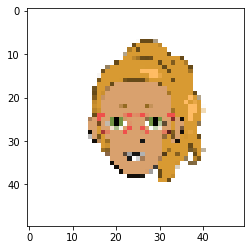

In [230]:
plt.imshow(X1[2])

In [231]:
train['eye_color'][2]

2

In [232]:
y = np.array(train)
y1 = y[:500]
y1.shape

(500, 1)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42, test_size=0.1)

In [234]:
X_train.shape

(450, 50, 50, 3)

In [235]:
X_test.shape

(50, 50, 50, 3)

In [236]:
X_train1 = X_train.reshape(450,3*50*50)
X_test1 = X_test.reshape(50,3*50*50)

In [243]:
# define support vector classifier
svm = SVC(kernel='poly', probability=True, random_state=42)

# fit model
svm.fit(X_train1, y_train)

C:\Users\devan\Anaconda3\envs\AMLS\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='poly', probability=True, random_state=42)

In [244]:
# generate predictions
y_pred = svm.predict(X_test1)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.66


In [271]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train1, y_train)

<ipython-input-271-fd619e26adc7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train1, y_train)


RandomForestClassifier(n_estimators=40)

In [272]:
model.score(X_test1, y_test)

0.84